#### Rutas

In [59]:
import os
# nos ubicamos en el directorio s
cur_path = os.getcwd()
if cur_path.endswith("notebooks"):
    cur_path = cur_path + "/.."
os.chdir(cur_path)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/exodia/Documentos/TFBigData


#### Librerias

In [60]:
import pyarrow.parquet as pq
import pandas as pd
import h2o
from h2o.frame import H2OFrame

In [61]:


# Leer el archivo Parquet con PyArrow
table = pq.read_table("data/DKHousingPrices.parquet")

# Convertir a Pandas (pandas entiende los tipos raros como Period)
df = table.to_pandas()


In [62]:
print(df.shape) 
print(f"El dataset tiene {df.shape[0]:,} filas")


(1507908, 19)
El dataset tiene 1,507,908 filas


In [63]:
df.head()


,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-26,2024Q4,0,Villa,regular_sale,1974,4350000,0.0,5,215.0,20232.558594,Kildevangen 5,8382,Hinnerup,East & mid jutland,Jutland,3.1,NaN,NaN
1,2024-10-26,2024Q4,2,Summerhouse,regular_sale,1956,450000,0.0,3,36.0,12500.000000,Lykkestien 2,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
2,2024-10-26,2024Q4,1,Farm,regular_sale,1955,6600000,0.0,3,180.0,36666.667969,Sæderupvej 58,9260,Gistrup,North jutland,Jutland,3.1,NaN,NaN
3,2024-10-25,2024Q4,3,Apartment,family_sale,1945,1495000,0.0,2,64.0,23359.375000,"Tage-Hansens Gade 5, 1. tv",8000,Aarhus C,East & mid jutland,Jutland,3.1,NaN,NaN
4,2024-10-25,2024Q4,4,Villa,regular_sale,1967,3375000,0.0,5,176.0,19176.136719,Chr.Winthers Vej 5,8600,Silkeborg,East & mid jutland,Jutland,3.1,NaN,NaN


In [64]:

df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1507908,2012-10-18 21:00:05.987633664,1992-01-05 00:00:00,2005-09-06 00:00:00,2015-03-15 00:00:00,2020-09-23 00:00:00,2024-10-26 00:00:00,NaN
house_id,1507908.0,753953.5,0.0,376976.75,753953.5,1130930.25,1507907.0,435295.689194
year_build,1507908.0,1954.942644,1000.0,1931.0,1965.0,1980.0,2024.0,45.841685
purchase_price,1507908.0,1915468.643398,250010.0,800000.0,1400000.0,2450000.0,46800000.0,1765653.841223
%_change_between_offer_and_purchase,1507908.0,-2.078361,-49.0,-3.0,0.0,0.0,49.0,4.80959
no_rooms,1507908.0,4.371574,1.0,3.0,4.0,5.0,15.0,1.650485
sqm,1507906.0,129.252762,26.0,89.0,123.0,160.0,997.0,57.199245
sqm_price,1507906.0,16345.246094,269.857422,6741.573242,12006.579102,21317.830078,75000.0,13626.266602
zip_code,1507908.0,5959.594102,1050.0,4000.0,6000.0,8260.0,9990.0,2369.319066
nom_interest_rate%,1507908.0,1.679423,0.0,0.0,0.75,3.25,9.5,2.04223


Casas construidas en el ano 1000? Cual es la moneda del precio de compra? se mantuvo la moneda en ese pais?

In [65]:
df.dtypes

date                                   datetime64[ns]
quarter                                 period[Q-DEC]
house_id                                        int64
house_type                                   category
sales_type                                   category
year_build                                      int16
purchase_price                                  int32
%_change_between_offer_and_purchase           float32
no_rooms                                         int8
sqm                                           float32
sqm_price                                     float32
address                                        object
zip_code                                        int16
city                                           object
area                                         category
region                                       category
nom_interest_rate%                            float32
dk_ann_infl_rate%                             float32
yield_on_mortgage_credit_bon

In [66]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

assert len(numeric_columns) + len(categorical_columns) == df.shape[1], "Hay columnas que no son ni numéricas ni categóricas"

In [67]:
numeric_columns

['house_id',
 'year_build',
 'purchase_price',
 '%_change_between_offer_and_purchase',
 'no_rooms',
 'sqm',
 'sqm_price',
 'zip_code',
 'nom_interest_rate%',
 'dk_ann_infl_rate%',
 'yield_on_mortgage_credit_bonds%']

In [68]:
categorical_columns

['date',
 'quarter',
 'house_type',
 'sales_type',
 'address',
 'city',
 'area',
 'region']

### 2. Limpieza de datos

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df.isna().sum()

date                                      0
quarter                                   0
house_id                                  0
house_type                                0
sales_type                                0
year_build                                0
purchase_price                            0
%_change_between_offer_and_purchase       0
no_rooms                                  0
sqm                                       2
sqm_price                                 2
address                                   0
zip_code                                  0
city                                      0
area                                      0
region                                    0
nom_interest_rate%                        0
dk_ann_infl_rate%                      1193
yield_on_mortgage_credit_bonds%        1193
dtype: int64

<Axes: >

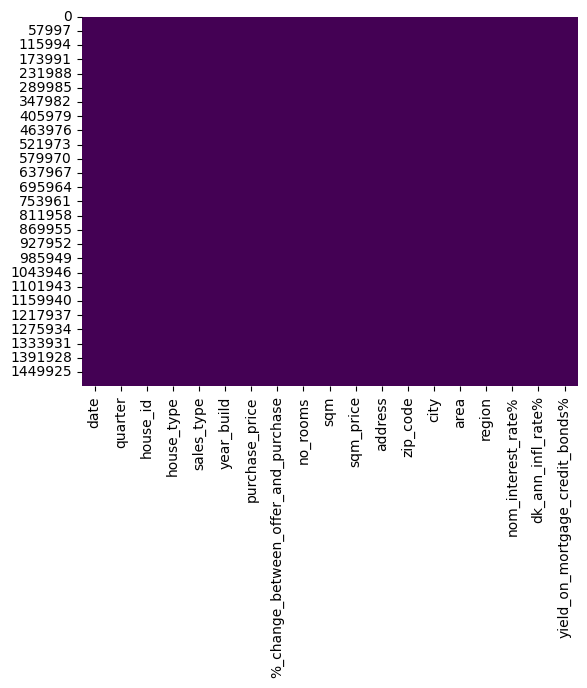

In [71]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

In [72]:
print("Valores vacios % por columna")
print(df.isna().sum()/ df.shape[0]*100)


Valores vacios % por columna
date                                   0.000000
quarter                                0.000000
house_id                               0.000000
house_type                             0.000000
sales_type                             0.000000
year_build                             0.000000
purchase_price                         0.000000
%_change_between_offer_and_purchase    0.000000
no_rooms                               0.000000
sqm                                    0.000133
sqm_price                              0.000133
address                                0.000000
zip_code                               0.000000
city                                   0.000000
area                                   0.000000
region                                 0.000000
nom_interest_rate%                     0.000000
dk_ann_infl_rate%                      0.079116
yield_on_mortgage_credit_bonds%        0.079116
dtype: float64


### Tratamiento de valores faltantes

Al inspeccionar los valores nulos, se encontró que las variables `sqm`, `sqm_price`, `dk_ann_infl_rate%` y `yield_on_mortgage_credit_bonds%` presentan proporciones extremadamente bajas de valores faltantes — todas por debajo del 0.08% del total de registros (~1.5 millones). En términos generales:

- % nulos en `sqm`: ~0.0001%
- % nulos en tasas macroeconómicas: ~0.079%

La literatura en machine learning recomienda que si el porcentaje de datos faltantes es menor al 5%, se pueden eliminar sin afectar la calidad del modelo. Es decir, si:

> (nulos / total) × 100 < 5%, → eliminación razonable

**Sin embargo**, dado que este trabajo forma parte de un curso de análisis de datos, optamos por **conservar los registros** e **imputar los valores faltantes**, demostrando manejo técnico del preprocesamiento.

Estrategia aplicada:

- Para `sqm` y `sqm_price`: se imputó la **mediana**, robusta frente a outliers.
- Para `dk_ann_infl_rate%` y `yield_on_mortgage_credit_bonds%`: se aplicó **propagación hacia adelante** (forward fill), asumiendo continuidad temporal entre trimestres.

Este enfoque conserva la estructura completa del dataset y evita introducir sesgos por eliminación.

Adicionalmente, los missing values se alamacenaran en un dataset aparte para su posterior analisis


In [73]:
# Crear un DataFrame con los registros que tienen algún valor nulo
df_missing = df[df[["sqm", "sqm_price", "dk_ann_infl_rate%", "yield_on_mortgage_credit_bonds%"]].isna().any(axis=1)]


In [74]:

df_missing.sample(5)

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
992,2024-10-02,2024Q4,1066,Villa,regular_sale,1934,995000,-9.0,4,115.0,8652.173828,Mejlbyvej 9,8370,Hadsten,East & mid jutland,Jutland,3.1,NaN,NaN
590,2024-10-08,2024Q4,631,Townhouse,regular_sale,1964,885000,-7.0,4,102.0,8676.470703,Birkevej 7,7451,Sunds,South jutland,Jutland,3.1,NaN,NaN
861,2024-10-03,2024Q4,930,Villa,regular_sale,1944,3350000,-4.0,6,170.0,19705.882812,Strandparken 1,6700,Esbjerg,South jutland,Jutland,3.1,NaN,NaN
580,2024-10-08,2024Q4,623,Villa,regular_sale,1960,345000,0.0,5,97.0,3556.700928,Lærkevej 20,7870,Roslev,South jutland,Jutland,3.1,NaN,NaN
396,2024-10-11,2024Q4,400,Townhouse,regular_sale,1906,3875000,-3.0,5,153.0,25326.796875,Zahnsgade 45,6000,Kolding,South jutland,Jutland,3.1,NaN,NaN


In [75]:
df_clean = df.copy()

# Imputar la mediana en variables numéricas directas
for col in ["sqm", "sqm_price"]:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Imputar forward fill para variables temporales macroeconómicas
for col in ["dk_ann_infl_rate%", "yield_on_mortgage_credit_bonds%"]:
    df_clean[col].fillna(method="ffill", inplace=True)


/tmp/ipykernel_19675/830630560.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipykernel_19675/830630560.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [76]:
#assert df_clean.isna().sum().sum() == 0, "Todos los valores nulos no han sido imputados correctamente."

In [77]:
df_clean.isna().sum()

date                                      0
quarter                                   0
house_id                                  0
house_type                                0
sales_type                                0
year_build                                0
purchase_price                            0
%_change_between_offer_and_purchase       0
no_rooms                                  0
sqm                                       0
sqm_price                                 0
address                                   0
zip_code                                  0
city                                      0
area                                      0
region                                    0
nom_interest_rate%                        0
dk_ann_infl_rate%                      1193
yield_on_mortgage_credit_bonds%        1193
dtype: int64

In [78]:

# Iniciar H2O y convertir a H2OFrame
h2o.init()
df_h2o = H2OFrame(df_clean)

# Verifica que todo esté bien
df_h2o.describe()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.7" 2025-04-15; OpenJDK Runtime Environment (build 21.0.7+6-Ubuntu-0ubuntu125.04); OpenJDK 64-Bit Server VM (build 21.0.7+6-Ubuntu-0ubuntu125.04, mixed mode, sharing)
  Starting server from /home/exodia/miniconda3/envs/TFBigData/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpen_oqd44
  JVM stdout: /tmp/tmpen_oqd44/h2o_exodia_started_from_python.out
  JVM stderr: /tmp/tmpen_oqd44/h2o_exodia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,00 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 7 days
H2O_cluster_name:,H2O_from_python_exodia_idvcve
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.652 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:1507908
Cols:19

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
type,time,enum,int,enum,enum,int,int,int,int,int,real,string,int,enum,enum,enum,real,real,real
mins,694569600000.0,,0.0,,,1000.0,250010.0,-49.0,1.0,26.0,269.857421875,NaN,1050.0,,,,0.0,0.25,1.100000023841858
mean,1350594005987.6338,,753953.5,,,1954.9426437156644,1915468.6433980053,-2.0783608814330825,4.371574393132738,129.25277536825865,16345.239699242433,NaN,5959.594101894808,,,,1.679422775092352,1.9299284800293088,4.112549228266259
maxs,1729900800000.0,,1507907.0,,,2024.0,46800000.0,49.0,15.0,997.0,75000.0,NaN,9990.0,,,,9.5,7.699999809265137,10.140000343322754
sigma,285407637044.9085,,435295.68919413886,,,45.84168536911033,1765653.8412228844,4.809590406106066,1.6504854621096352,57.19920863431885,13626.25903886033,NaN,2369.3190660346036,,,,2.0422294920182185,1.636800308445652,2.193449306606803
zeros,0,,1,,,0,0,966554,0,0,0,0,0,,,,698458,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1193,1193
0,2024-10-26 00:00:00,2024Q4,0.0,Villa,regular_sale,1974.0,4350000.0,0.0,5.0,215.0,20232.55859375,Kildevangen 5,8382.0,Hinnerup,East & mid jutland,Jutland,3.0999999046325684,nan,nan
1,2024-10-26 00:00:00,2024Q4,2.0,Summerhouse,regular_sale,1956.0,450000.0,0.0,3.0,36.0,12500.0,Lykkestien 2,4400.0,Kalundborg,Other islands,Zealand,3.0999999046325684,nan,nan
2,2024-10-26 00:00:00,2024Q4,1.0,Farm,regular_sale,1955.0,6600000.0,0.0,3.0,180.0,36666.66796875,Sæderupvej 58,9260.0,Gistrup,North jutland,Jutland,3.0999999046325684,nan,nan


In [79]:
categorical_columns.remove("date")  # Eliminamos la columna de fecha, no es categórica

In [80]:

for col in categorical_columns:
    print(f"Convirtiendo {col} a factor")
    try:
        df_h2o[col] = df_h2o[col].asfactor()
    except Exception as e:
        print(f"Error al convertir {col} a factor: {e}")

Convirtiendo quarter a factor
Convirtiendo house_type a factor
Convirtiendo sales_type a factor
Convirtiendo address a factor
Convirtiendo city a factor
Convirtiendo area a factor
Convirtiendo region a factor


In [81]:

# Variables finales
target = "purchase_price"
features = [col for col in df_h2o.columns if col != target and col != "date"]

In [82]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.automl import H2OAutoML

train, test = df_h2o.split_frame(ratios=[0.8])


In [83]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm = H2OGeneralizedLinearEstimator()
glm.train(x=features, y=target, training_frame=train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1751683458838_1


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 269860.0 )  1121893                       10                             2                       py_29_sid_8eb6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 3128039130498.8755
RMSE: 1768626.3399878663
MAE: 1188387.3498518085
RMSLE: 0.8410976226111424
Mean Residual Deviance: 3128039130498.8755
R^2: 1.113525370710633e-05
Null degrees of freedom: 1206453
Residual degrees of freedom: 1206443
Null deviance: 3.7738773442286223e+18
Residual deviance: 3.77383532114689e+18
AIC: 38135195.86896942

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ---------------------
    2025-07-04 21:44:42  0.000 sec   0             3.7738773437329715e+18     3128073961985.2656
    2025-07-04 21:44:42  0.594 sec   2                                                            1768626.3399878663  3128039130498.8755   1188387.3498518085  1.113525370710633e-05

Variable Importances: 
variable                             relative_importance    scaled_importance     percentage
-----------------------------------  ---------------------  --------------------  --------------------
sqm_price                            8.999921798706055      1.0                   0.4080915035061963
house_id                             2.707385301589966      0.30082320292818704   0.12276339317251343
sqm                                  2.320648670196533      0.2578520927293146    0.10522724820412512
zip_code                             2.1838700771331787     0.24265433922405416   0.09902517412624684
yield_on_mortgage_credit_bonds%      2.079108238220215      0.23101403375739712   0.09427486436708737
nom_interest_rate%                   1.4679397344589233     0.16310583217178323   0.06656210428161234
no_rooms                             1.2668180465698242     0.14075878378765005   0.057442463707605716
area.Capital, Copenhagen             0.551280677318573      0.06125394082844501   0.024997212808359703
region.Zealand                       0.3742460608482361     0.04158325696808194   0.01696977385678907
region.Jutland                       0.10246720165014267    0.011385343555415635  0.004646261969464148
---                                  ---                    ---                   ---
house_type.Apartment                 0.0                    0.0                   0.0
house_type.Farm                      0.0                    0.0                   0.0
house_type.Summerhouse               0.0                    0.0                   0.0
house_type.Townhouse                 0.0                    0.0                   0.0
house_type.Villa                     0.0                    0.0                   0.0
region.Bornholm                      0.0                    0.0                   0.0
region.Fyn & islands                 0.0                    0.0                   0.0
year_build                           0.0                    0.0                   0.0
%_change_between_offer_and_purchase  0.0                    0.0                   0.0
dk_ann_infl_rate%                    0.0                    0.0                   0.0
[1121893 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.

In [84]:

# Modelo GLM
glm = H2OGeneralizedLinearEstimator(family="gaussian")
glm.train(x=features, y=target, training_frame=train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1751683458838_2


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 269860.0 )  1121893                       10                             2                       py_29_sid_8eb6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 3128039130498.8755
RMSE: 1768626.3399878663
MAE: 1188387.3498518085
RMSLE: 0.8410976226111424
Mean Residual Deviance: 3128039130498.8755
R^2: 1.113525370710633e-05
Null degrees of freedom: 1206453
Residual degrees of freedom: 1206443
Null deviance: 3.7738773442286223e+18
Residual deviance: 3.77383532114689e+18
AIC: 38135195.86896942

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ---------------------
    2025-07-04 21:44:51  0.000 sec   0             3.7738773437329715e+18     3128073961985.2656
    2025-07-04 21:44:51  0.356 sec   2                                                            1768626.3399878663  3128039130498.8755   1188387.3498518085  1.113525370710633e-05

Variable Importances: 
variable                             relative_importance    scaled_importance     percentage
-----------------------------------  ---------------------  --------------------  --------------------
sqm_price                            8.999921798706055      1.0                   0.4080915035061963
house_id                             2.707385301589966      0.30082320292818704   0.12276339317251343
sqm                                  2.320648670196533      0.2578520927293146    0.10522724820412512
zip_code                             2.1838700771331787     0.24265433922405416   0.09902517412624684
yield_on_mortgage_credit_bonds%      2.079108238220215      0.23101403375739712   0.09427486436708737
nom_interest_rate%                   1.4679397344589233     0.16310583217178323   0.06656210428161234
no_rooms                             1.2668180465698242     0.14075878378765005   0.057442463707605716
area.Capital, Copenhagen             0.551280677318573      0.06125394082844501   0.024997212808359703
region.Zealand                       0.3742460608482361     0.04158325696808194   0.01696977385678907
region.Jutland                       0.10246720165014267    0.011385343555415635  0.004646261969464148
---                                  ---                    ---                   ---
house_type.Apartment                 0.0                    0.0                   0.0
house_type.Farm                      0.0                    0.0                   0.0
house_type.Summerhouse               0.0                    0.0                   0.0
house_type.Townhouse                 0.0                    0.0                   0.0
house_type.Villa                     0.0                    0.0                   0.0
region.Bornholm                      0.0                    0.0                   0.0
region.Fyn & islands                 0.0                    0.0                   0.0
year_build                           0.0                    0.0                   0.0
%_change_between_offer_and_purchase  0.0                    0.0                   0.0
dk_ann_infl_rate%                    0.0                    0.0                   0.0
[1121893 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.

In [85]:
from h2o.estimators.xgboost import H2OXGBoostEstimator

xgb = H2OXGBoostEstimator(
    ntrees=200,                # más árboles = mejor rendimiento si hay tiempo
    max_depth=6,               # profundidad controlada
    learn_rate=0.05,           # más bajo si aumentas ntrees
    booster="gbtree",
    backend="gpu",             # ⚡️ fuerza uso de GPU
    nthread=-1,                # ⚙️ usa todos los hilos disponibles de CPU para tareas auxiliares
    seed=42                    # reproducibilidad
)

xgb.train(x=features, y=target, training_frame=train)


xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1751683458838_3


Model Summary: 
    number_of_trees
--  -----------------
    200

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 7110397112.615851
RMSE: 84323.17067458891
MAE: 20163.897618014238
RMSLE: 0.027154980609550995
Mean Residual Deviance: 7110397112.615851

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  -----------------  -----------------  ------------------  ------------------  -------------------
     2025-07-04 21:45:00  0.007 sec          0.0                2607689.8916331893  1916239.183538701   6800046570925.915
     2025-07-04 21:45:26  26.364 sec         1.0                2479730.9324732916  1820440.3805639183  6149065497464.861
     2025-07-04 21:45:51  50.891 sec         2.0                2358176.4815140073  1729430.4668136372  5560996317965.784
     2025-07-04 21:46:15  1 min 15.361 sec   3.0                2242640.4707182683  1642970.453223442   5029436280903.455
     2025-07-04 21:46:40  1 min 39.929 sec   4.0                2132854.7134463857  1560833.8122047002  4549069228670.464
     2025-07-04 21:47:04  2 min  4.489 sec   5.0                2028443.5336946065  1482802.662288914   4114583169387.462
     2025-07-04 21:47:29  2 min 29.052 sec   6.0                1929086.7046444844  1408673.6844426738  3721375514036.1167
     2025-07-04 21:47:53  2 min 53.638 sec   7.0                1834820.1908701668  1338249.0871338132  3366565132824.835
     2025-07-04 21:48:18  3 min 18.200 sec   8.0                1745032.5958439065  1271345.8825952117  3045138760557.723
     2025-07-04 21:48:43  3 min 42.767 sec   9.0                1659766.6701797012  1207787.5054492145  2754825399439.413
---  ---                  ---                ---                ---                 ---                 ---
     2025-07-04 22:32:41  47 min 40.770 sec  183.0              85469.5300984197    20268.89567740979   7305040575.244671
     2025-07-04 22:32:50  47 min 50.410 sec  185.0              85345.99215414113   20269.084977312647  7283938376.774719
     2025-07-04 22:33:00  48 min  0.061 sec  187.0              85224.07422101632   20269.112697495097  7263142826.829298
     2025-07-04 22:33:10  48 min  9.713 sec  189.0              85103.53805025521   20268.972062367277  7242612188.671237
     2025-07-04 22:33:19  48 min 19.360 sec  191.0              84984.58395433248   20268.697566820825  7222379509.8909855
     2025-07-04 22:33:29  48 min 28.997 sec  193.0              84867.2714668451    20268.28640987866   7202453766.227179
     2025-07-04 22:33:46  48 min 45.832 sec  194.0              84666.44581658253   20166.04312345829   7168407047.212306
     2025-07-04 22:33:55  48 min 55.506 sec  196.0              84550.53152981847   20165.414520311177  7148792381.974829
     2025-07-04 22:34:05  49 min  5.176 sec  198.0              84436.03415016425   20164.697404827493  7129443863.007704
     2025-07-04 22:34:15  49 min 14.868 sec  200.0              84323.17067458891   20163.897618014238  7110397112.615851
[157 rows x 7 columns]


Variable Importances: 
variable                          relative_importance     scaled_importance       percentage
--------------------------------  ----------------------  ----------------------  ----------------------
sqm_price                         2.499070742874397e+19   1.0                     0.6472570763971057
sqm                               1.3527407005249044e+19  0.5412974820268596      0.35035862567781995
no_rooms                          2.9648047575138304e+16  0.0011863628774685074   0.0007678817676163239
city.Odense N                     1.2082080158580736e+16  0.00048346291088519137  0.0003129247902459834
address.Høsterkøbvej 6            2622785130070016.0      0.00010495041557140253  6.792989914940728e-05
address.Vedbæk Strandvej 341, st  24115508538

In [86]:

# # Modelo RF
# rf = H2ORandomForestEstimator()
# rf.train(x=features, y=target, training_frame=train)


In [87]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(
    include_algos=["XGBoost"],  # ⚡️ limita AutoML a solo modelos que pueden usar GPU
    max_runtime_secs=600,
    seed=1,
    sort_metric="RMSE"
)

aml.train(x=features, y=target, training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20250704_223417


Model Summary: 
    number_of_trees
--  -----------------
    1

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 3528002279254.4287
RMSE: 1878297.707833992
MAE: 1343382.312437761
RMSLE: 1.20322468469451
Mean Residual Deviance: 3528002279254.4287

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 3562611284225.15
RMSE: 1887488.0884988785
MAE: 1350836.1232439065
RMSLE: 1.204004560517731
Mean Residual Deviance: 3562611284225.15

Scoring History: 
    timestamp            duration           number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  -----------------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2025-07-04 22:34:18  0.004 sec          0                  2.60656e+06      1.91587e+06     6.79418e+12          2.61786e+06        1.92647e+06       6.8532e+12
    2025-07-04 22:46:49  12 min 31.539 sec  1                  1.8783e+06       1.34338e+06     3.528e+12            1.88749e+06        1.35084e+06       3.56261e+12

Variable Importances: 
variable                relative_importance     scaled_importance       percentage
----------------------  ----------------------  ----------------------  ----------------------
sqm_price               9.964465001647309e+17   1.0                     0.7236881940921353
no_rooms                3.3881918102359245e+17  0.34002746857716837     0.24607386467633127
house_type.Summerhouse  1.7278215345143808e+16  0.017339832436851756    0.012548632022085476
house_type.Farm         9291010693660672.0      0.0093241440379636      0.0067477729602888285
year_build              7819474367414272.0      0.0078473599597385      0.005679041757654087
house_type.Villa        5325841051418624.0      0.005344833917865299    0.0038679932057423304
house_type.Apartment    867719691894784.0       0.0008708141297614413   0.0006301979049569719
nom_interest_rate%      242151464108032.0       0.0002430150179342292   0.0001758670994660902
dk_ann_infl_rate%       135216106569728.0       0.0001356983104937137   9.820326526254952e-05
quarter.2021Q3          102122997678080.0       0.0001024871858762083   7.416876646433818e-05
---                     ---                     ---                     ---
city.Lejre              490700013568.0          4.924499343285147e-07   3.563802036549934e-07
city.Odder              417752678400.0          4.1924245639975434e-07  3.03400816158689e-07
city.Nørre Nebel        388660985856.0          3.9004701786974736e-07  2.822724219731803e-07
quarter.1999Q4          255215009792.0          2.561251504720106e-07   1.8535474760666574e-07
city.Hjørring           164685152256.0          1.652724478722887e-07   1.196057193338832e-07
city.Vodskov            126701535232.0          1.271533747281504e-07   9.201939612973571e-08
quarter.2013Q3          69155684352.0           6.94023054329232e-08    5.022562908458297e-08
quarter.2023Q3          44459622400.0           4.4618173070656585e-08  3.228964509319381e-08
city.Randers NA         16894656512.0           1.6954905766849504e-08  1.2270065135413648e-08
city.Odense C           6308233216.0            6.330729462100708e-09   4.581474171713537e-09
[60 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.